# K-Means Clustering

## Clustering
* Goal: find the underlying **structure** of the data
* **Unsupervised** learning: no ground-truth labels given
* What are the different populations in the data? How can we characterise them?

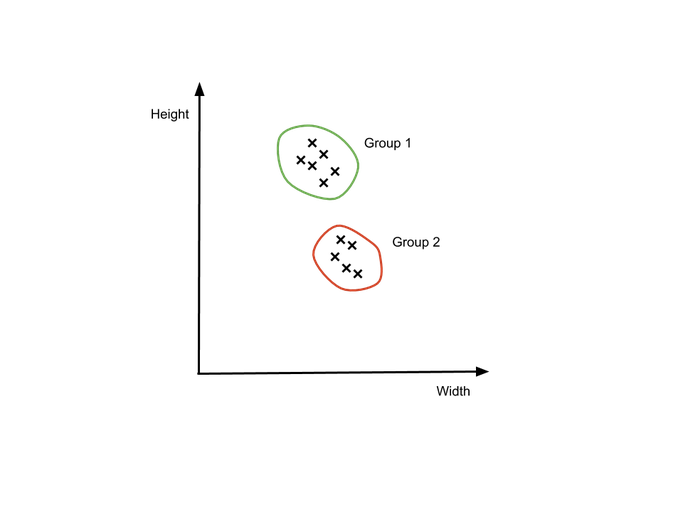

Welcome to K-Means clustering lecture! Before we discuss K-Means in particular, we discuss the general topic of clustering. In clustering, the goal is to find the underlying structure of the data (as opposed to, for example, doing classification or regression). Clustering belongs to unsupervised learning; there are no ground-truth labels given. Clustering helps answer questions such as "What are the different populations in the data?" and "How can we characterise them?".

## Clustering is Subjective
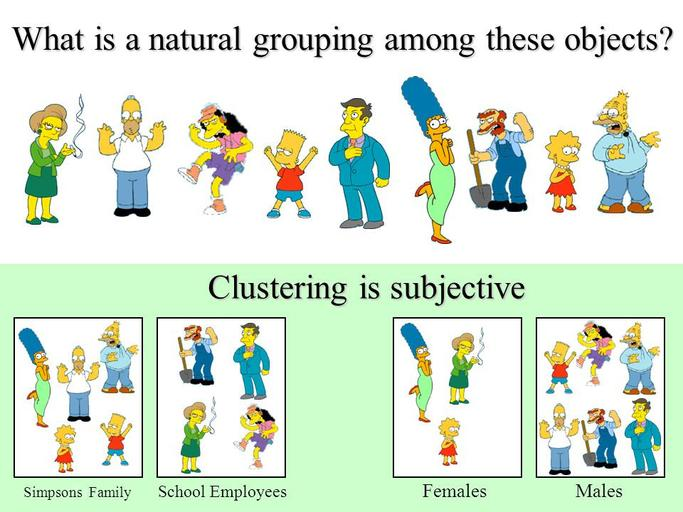

One important point to mention at the beginning is that clustering is inherently subjective. One group of people may think there is one way of natural grouping among given objects, while another group will find another perfectly valid natural grouping of the objects. For example, in the cartoon on the slide we can group the characters as the Simpsons family vs school employees or females vs males.

## Overview of K-Means Clustering
* Partition **$n$** data points into **$k$** clusters
    * **$k$** is specified by us
* The **centre** of each cluster is calculated as the **mean** of the points in the cluster
* Each point belongs to the cluster with the **nearest** mean
    * **Hard** clustering rather than soft: a point belongs to only one cluster
* **No hierarchy** between clusters
* The algorithm produces exactly **$k$** different clusters of greatest possible distinction
* The process is **sensitive** to our choice of **$k$** and the initialisation

Having covered the broader area of clustering, we discuss K-Means in particular. K-Means algorithm partitions $n$ data points into $k$ clusters, where $k$ is specified by us. The centre of each cluster is calculated as the mean of the points in the cluster. Each point belongs to the cluster with the nearest mean. In K-Means, a point belongs to only one cluster rather than multiple ones with different levels, so K-Means is an example of hard clustering rather than soft. There is no hierarchy between clusters. The algorithm produces exactly $k$ different clusters of greatest possible distinction and the process is sensitive to our choice of $k$ and the initialisation.

## Algorithm
* Randomly initialize centres of the **$k$** clusters
* Until cluster assignments stop changing (convergence):
    * **Assign points to clusters**: based on which cluster centre is the nearest to the point (e.g. in terms of the Euclidean distance)
    * **Re-calculate cluster centres**: as the mean of coordinates of all points assigned to the cluster

The algorithm for training or fitting K-Means is very simple. The first step is to randomly initialize centres of the $k$ clusters. After this we repeat two steps until cluster assignments stop changing. The first of these two steps is to assign points to clusters. This is based on which cluster centre is the nearest to the point (e.g. in terms of the Euclidean distance). The second step is to recalculate cluster centres: as the mean of coordinates of all points assigned to the cluster.

To make it easier to understand how the K-Means algorithm works, we will go through a step by step illustration.

## Illustration - Step 1
Data points:
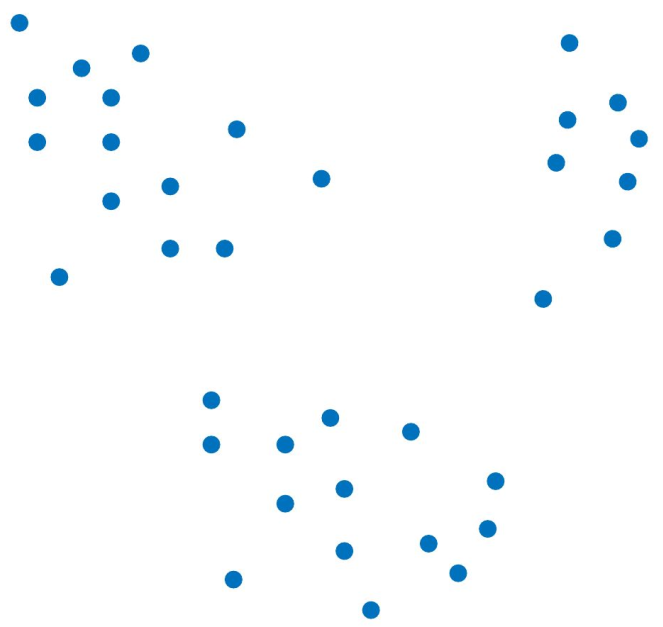

We start with the data points,

## Illustration - Step 2
Initial cluster centres:
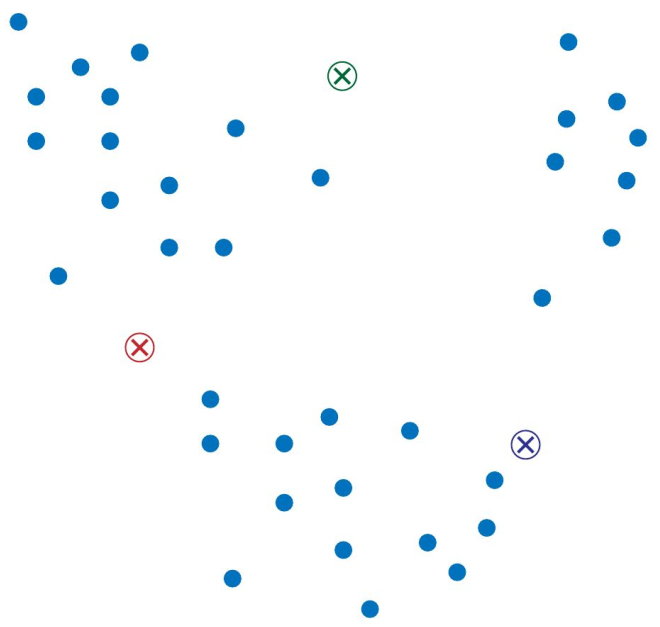

as well as randomly initialized cluster centres.

## Illustration - Step 3
Assign points to clusters:
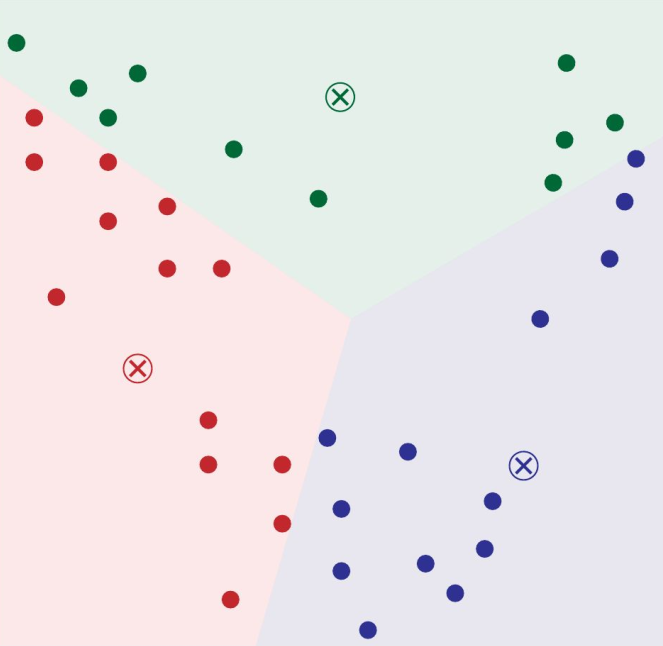

Now we enter the loop that is repeated until convergence. We assign points to their closest cluster centres.

## Illustration - Step 4
Update cluster centres:
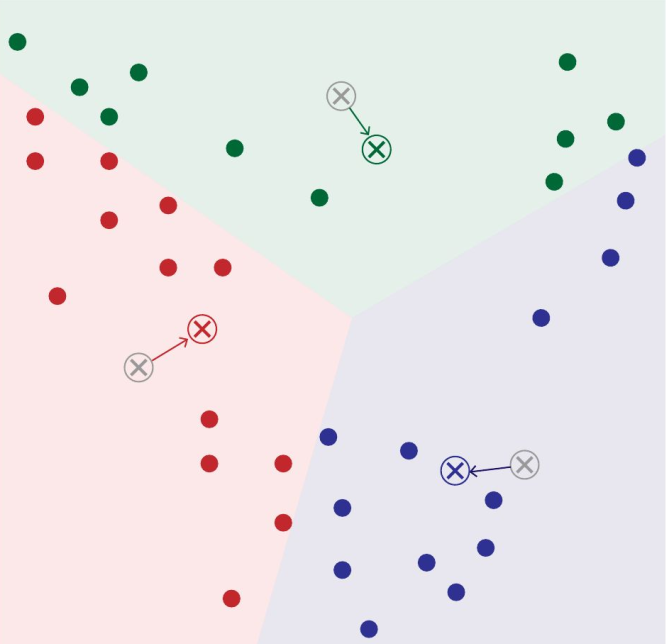

After this we recalculate the cluster centres based on which points were assigned to the clusters.

## Illustration - Step 5
Reassign points to clusters:
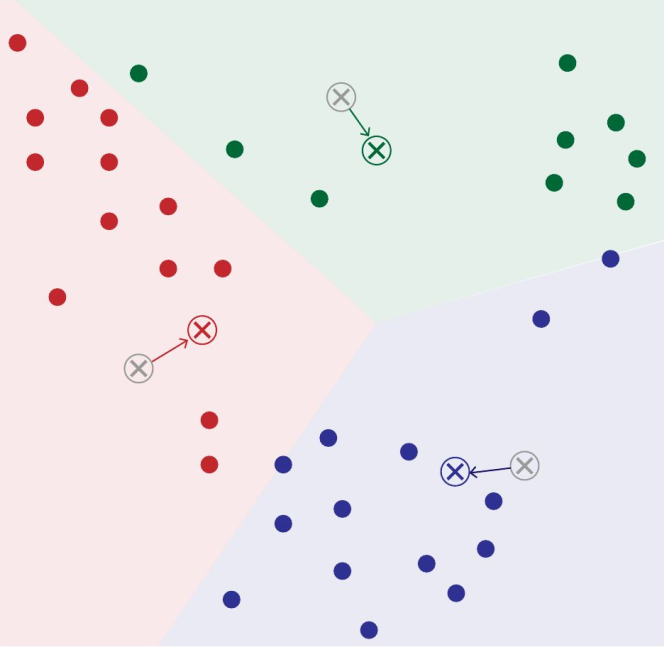

We then again assign data points to their nearest clusters, following the update of cluster centres.

## Illustration - Step 6
Update cluster centres:
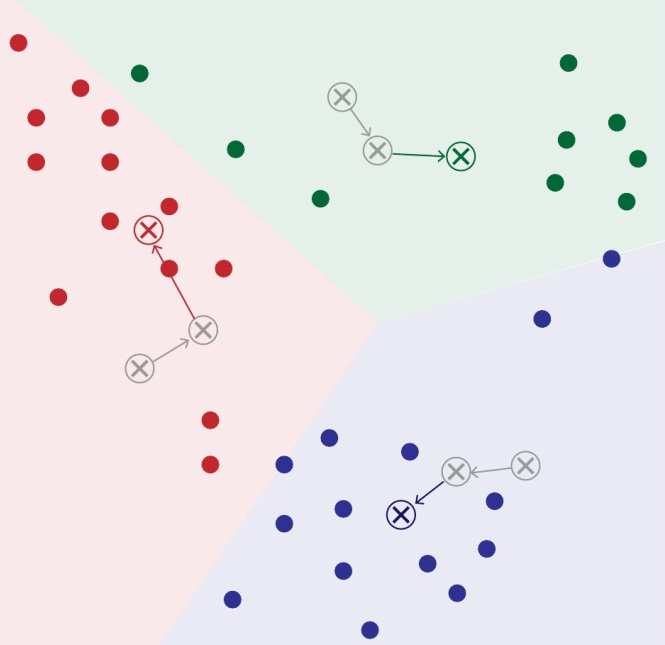

We do a further update of the cluster centres.

## Illustration - Step 7
Reassign points to clusters:
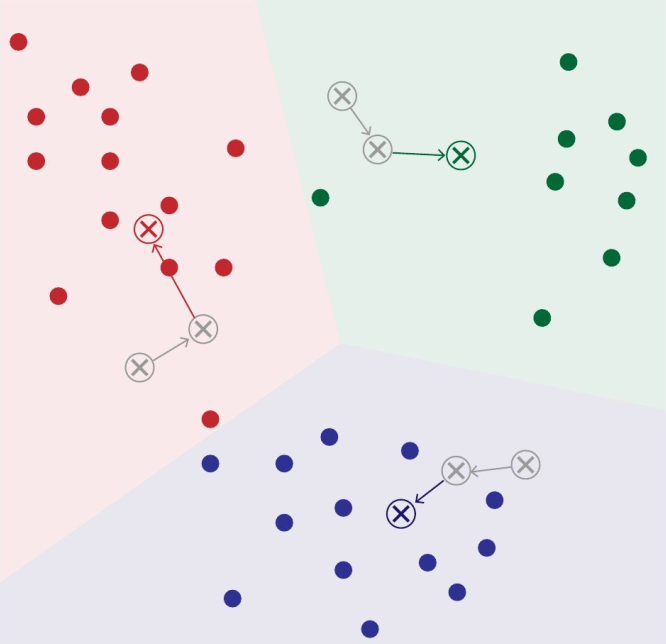

Again update the assignment of data points into clusters.

## Illustration - Step 8
Update cluster centres:
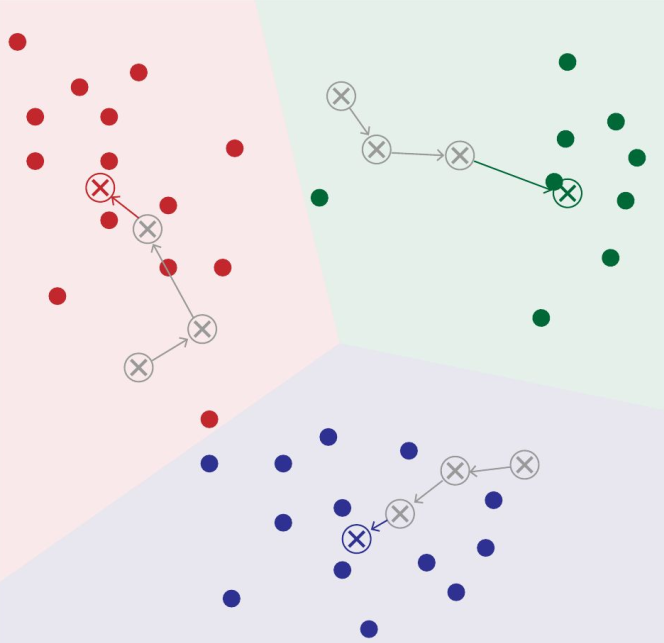

Recalculate the cluster centres.

## Illustration - Step 9
Reassign points to clusters - converged:
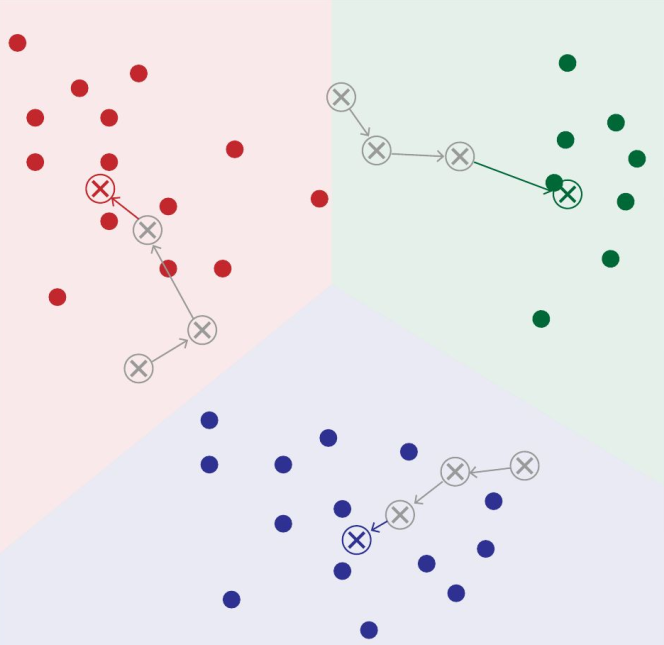

After which we end up with the final assignment of data points into clusters.

## K-Means in Sklearn
* Available as ``KMeans`` from ``sklearn.cluster``
* Our data:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#hide
data_points = [[1, 1], [1.2, 0.97], [0.9, 0.95], [1.1, 1.04], [2, 1.5], [2.1, 1.4], [1.9, 1.55], [1.8, 1.45]]

plt.scatter([x[0] for x in data_points], [x[1] for x in data_points], s=130)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Dimension 2', fontsize=16)
plt.xlabel('Dimension 1', fontsize=16)
plt.show()
#/hide

Now we discuss how K-Means can be used in practice using ``sklearn`` library. We will work with the data visualized in the plot. They are stored under the name `data_points`.

## K-Means in Sklearn
* How to create a K-Means object in ``sklearn``:

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)

* How to fit K-Means:

In [ ]:
kmeans.fit(data_points)

* How to get cluster assignment:

In [ ]:
cluster_assignment = kmeans.predict(data_points)

The first step is to import ``KMeans`` from ``sklearn.cluster``, after which we can create a K-Means object with a selected number of clusters. In our case we select two clusters. The next step is to fit the model to the data points provided. Finally, we can assign the data points into clusters using ``kmeans.predict`` method.

## K-Means in Sklearn
* Visualization of the solution:

In [ ]:
#hide
sns.scatterplot(x=[x[0] for x in data_points], y=[x[1] for x in data_points], s=130, hue=cluster_assignment)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Dimension 2', fontsize=16)
plt.xlabel('Dimension 1', fontsize=16)
plt.legend(fontsize=14, loc=4)
plt.show()
#/hide

Let's visualize the cluster assignment. As we can see, the clusters make sense and are as we would expect.

## Inertia
* K-Means algorithm minimizes a quantity called **inertia**: within-cluster sum-of-squares
    * Inertia formula: $$I=\sum_{i=1}^k \sum_{\mathbf{x}\in C_i} D(\mathbf{x}, \mathbf{\mu}_i)^2$$
    * Notation: number of clusters $k$, $i$-th cluster denoted as $C_i$ centred at $\mathbf{\mu}_i$, data points $\mathbf{x}$, distance $D$ (e.g. Euclidean distance)
    * $\mathbf{x}\in C_i$ says that we only include points that belong to cluster $C_i$
* Inertia describes the **internal coherence** of clusters
* Limitations of inertia:
    * Assumes **globular** (circular) shape of clusters: does not work well for e.g. elongated clusters
    * **Not normalized**: zero is optimal and lower value is better, but no upper bound on the value

Let's have a look under the hood of the K-Means algorithm. K-Means algorithm intrinsically minimizes a quantity called inertia: within-cluster sum-of-squares. The formula sums over the $k$ different clusters, and for each of them it sums over all of the points that belong to the specific cluster $C_i$. It uses the square of the distance $D$ between the point $\mathbf{x}$ and the cluster centre $\mathbf{\mu}_i$. We can use the Euclidean distance.

Inertia describes the internal coherence of clusters. It has several limitations: 1) It assumes globular (circular) shape of clusters, which does not work well for e.g. elongated clusters. 2) It is not normalized: zero is optimal and lower value is better, but there is no upper bound on the value, so we cannot say much based on a single value of inertia - but we can compare it across different cases.

## Helper Functions
* Useful for calculating inertia and explaining K-Means details
* List of methods:
    * Calculate the Euclidean distance
    * Find the nearest cluster to a point
    * Assign points to clusters
    * Find the centre of one cluster
    * Calculate cluster centres

We will go over inertia calculation in more detail and for this we will need several helper functions. These helper functions will also help explain some details of the K-Means algorithm.

List of methods:
* Calculate the Euclidean distance
* Find the nearest cluster to a point
* Assign points to clusters
* Find the centre of one cluster
* Calculate cluster centres

## Euclidean Distance
Formula: $$D(\mathbf{a}, \mathbf{b})=\sqrt{(a_1-b_1)^2+(a_2-b_2)^2 + ... + (a_n-b_n)^2}=\sqrt{\sum_{i=1}^n (a_i-b_i)^2}$$


In [ ]:
def euclidean_distance(a, b):
    sum_of_squares = 0
    for a_i, b_i in zip(a, b):
        sum_of_squares += (a_i - b_i) ** 2
    return sum_of_squares ** 0.5

The Euclidean distance between two vectors $\mathbf{a}$ and $\mathbf{b}$ can be calculated as the square root of the sum of the squared differences between the elements of these two vectors. The code snippet shows how we can implement a function for calculating the Euclidean distance.

## Find the Nearest Cluster to a Point
* Find which cluster centre is the closest to a data point

In [ ]:
def find_nearest_cluster(cluster_centres, data_point):
    nearest_cluster = None
    nearest_distance = 9999999999
    
    for i, cluster_centre in enumerate(cluster_centres):
        distance = euclidean_distance(cluster_centre, data_point)
        if distance < nearest_distance:
            nearest_distance = distance
            nearest_cluster = i

    return nearest_cluster

Our next method is used for finding which cluster centre is the closest to a certain data point. The function receives two arguments: `cluster_centres` and `data_point`. `cluster_centres` is a list of lists, where each sublist represents the coordinates of the cluster centre. `data_point` represents the coordinates of the point in question and is a simple list. At the beginning we initialize the nearest cluster as `None` and the nearest distance as some extremely large number, representing infinity. We iterate over all cluster centres and calculate the Euclidean distance between the point and the specific cluster. We check if the current distance is smaller than the smallest so far, and if yes, we update the value. In the end we return the index or label of the nearest cluster.

## Assign Points to Clusters
* Assign each data point to its nearest cluster

In [ ]:
def assign_points_to_clusters(cluster_centres, data_points):
    # initialize
    cluster_assignment = {}
    for cluster in range(len(cluster_centres)):
        cluster_assignment[cluster] = []
        
    # assign data points
    for data_point in data_points:
        nearest_cluster = find_nearest_cluster(cluster_centres, data_point)
        cluster_assignment[nearest_cluster].append(data_point)
        
    return cluster_assignment

The next method is used for assigning points to clusters. It receives the same inputs as the previous method and has two main steps: 1) initialize the cluster assignment to empty values and 2) actually assign the data points to their nearest clusters. Cluster assignment is represented as a dictionary with cluster index or label as the key and a list of coordinates of the assigned points. We iterate over all data points and get the nearest cluster using our `find_nearest_cluster` method. We assign these to the corresponding clusters and in the end return the cluster assignment dictionary.

## Find the Centre of One Cluster
* Calculate the sum of points in each dimension and divide by the number of points

In [ ]:
def find_cluster_centre(data_points, num_dims):
    sum_per_dim = [0 for dim in range(num_dims)]
    for data_point in data_points:
        for dim, value in enumerate(data_point):
            sum_per_dim[dim] += value
            
    num_points = len(data_points)
    mean_coordinate = [sum_per_dim[dim] / num_points
                       for dim in range(num_dims)]
    return mean_coordinate

Method `find_cluster_centre` is not used for the calculation of inertia, but it is useful for explaining details of some steps of the general K-Means algorithm. It receives a list of data points assigned to the given cluster as well as the number of dimensions used for initialization. We pass the number of dimensions as a parameter because it may happen that data_points are empty and then we could not infer the dimensionality from an element of data_points list. The idea of the algorithm is simple: we sum the values of all data points for each dimension or coordinate separately and then we calculate the mean coordinate by dividing by the number of data points.

## Calculate Cluster Centres
* Calculate cluster centres based on the assignment of points to clusters

In [ ]:
def calculate_cluster_centres(cluster_assignment, num_dims):
    cluster_centres = {}
    
    for cluster_i in cluster_assignment:
        data_points = cluster_assignment[cluster_i]
        cluster_centres[cluster_i] = find_cluster_centre(data_points, num_dims)
        
    return cluster_centres

The method that we have just defined is used as part of a method for calculating cluster centres of all clusters. This method, calculate_cluster_centres, receives as input the cluster_assignment dictionary and the number of dimensions. For each cluster, we pass the assigned data points into find_cluster_centre method and get the corresponding cluster centre. In the end we return the cluster centres of all clusters.

## Inertia Calculation
* Inertia formula: $$I=\sum_{i=1}^k \sum_{\mathbf{x}\in C_i} D(\mathbf{x}, \mathbf{\mu}_i)^2$$
* Notation: number of clusters $k$, $i$-th cluster denoted as $C_i$ centred at $\mathbf{\mu}_i$, data points $\mathbf{x}$, distance $D$ (e.g. Euclidean distance)

In [ ]:
def calculate_inertia(cluster_centres, data_points):
    cluster_assignment = assign_points_to_clusters(cluster_centres, data_points)
    
    inertia_total = 0
    for cluster_i in cluster_assignment:
        inertia_i = 0
        cluster_centre = cluster_centres[cluster_i]
        
        for data_point in cluster_assignment[cluster_i]:
            inertia_i += euclidean_distance(cluster_centre, data_point) ** 2
            
        inertia_total += inertia_i
        
    return inertia_total

Now that we have defined various helper functions, we put them together to calculate inertia. As a reminder, we want to implement the calculation based on the formula for inertia that we have seen earlier. Our `calculate_inertia` method receives two parameters: cluster_centres, which is a list of coordinates of the different cluster centres and `data_points`, which is simply a list of lists with coordinates of the different data points.

At the beginning of the method, we assign the points received as input into the clusters based on their coordinates and the coordinates of the cluster centres - using `assign_points_to_clusters` method. We then iterate over each cluster separately, similarly as in the formula, and calculate the inertia for cluster $i$, which we then add to the total sum of inertia. This local inertia is the sum of squared Euclidean distances between the data points $\mathbf{x}$ in the current cluster $C_i$ and the cluster centre $\mathbf{\mu}_i$. We return the sum of local inertias across all clusters.

## Example
* Data points and cluster centres are given:

In [ ]:
#hide
data_points = [[1, 1], [1.2, 0.97], [0.9, 0.95], [1.1, 1.04], [2, 1.5], [2.1, 1.4], [1.9, 1.55], [1.8, 1.45]]
cluster_centres = [[1.05, 0.99], [1.95, 1.48]]

plt.scatter([x[0] for x in data_points], [x[1] for x in data_points], s=130, label='Data points')
plt.scatter([x[0] for x in cluster_centres], [x[1] for x in cluster_centres], s=130, marker='x', label='Cluster centres')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Dimension 2', fontsize=16)
plt.xlabel('Dimension 1', fontsize=16)
plt.legend(fontsize=14, loc=4)
plt.show()
#/hide

* Inertia calculation for these points and cluster centres:

In [ ]:
calculate_inertia(cluster_centres, data_points)

As an example, we receive the data points and cluster centres in the plot as the input. We can easily call the `calculate_inertia` method to get the value of inertia for these cluster centres and data points.

Inertia is also easily available as attribute ``inertia_`` of a fitted ``KMeans`` model.

## Convergence to Local Optimum
* K-Means algorithm converges to a **local** optimum
    * Solution: run K-Means with **multiple random** initializations and choose clustering with the **lowest** inertia
    * ``n_init`` parameter for ``KMeans`` in ``sklearn``

Let's discuss a further property of the K-Means algorithm - convergence to local optimum. This is something which is not desirable because it means we get a different solution (sometimes very different one) when we use a different random initialization. The solution to this problem is to run run K-Means with multiple random initializations and choose a clustering with the lowest inertia. In ``sklearn``, this can be done easily using ``n_init`` parameter, which is by default set to 10 to automatically do multiple repetitions.

## Feature Normalization
* KMeans clustering uses the Euclidean distance (could use another one too)
* Dimensions with **larger** values will **dominate** the calculations - not desirable
* Solution: **rescale** the features
* Common options:
    * **Min-Max normalization**: subtract the minimum and divide by the range (maximum - minimum)
    * **Standardization**: subtract the mean and divide by the standard deviation

Another property of KMeans clustering is that it is sensitive to the scale of the different features used. This is a consequence of using the Euclidean distance and means that dimensions with larger values will dominate the calculations. We want to avoid this and the way to solve it is to rescale the features. There are many ways to do it (see [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing "preprocessing") for the different methods that can be used), but two of the most common include: 

* Min-Max normalization: subtract the minimum and divide by the range (maximum - minimum)
* Standardization: subtract the mean and divide by the standard deviation

In case you are also wondering how to select the features or their number: doing it automatically is an active area of research, but in practice you can use domain knowledge to decide if the specific feature is relevant.

## How to Choose Number of Clusters?
* Try various values of $k$ and then use **elbow** or **silhouette** methods

One of the key challenges in K-Means clustering is the need to select a good value of $k$. How do we do it? We can do it visually, but that is not practical when the number of dimensions is large. Two common methods are called elbow and silhouette methods.

## Elbow Method
* Measure inertia for different numbers of clusters
* Problem: inertia minimized when there is one cluster for each point
* Use scree plot: visually select where the rate of decline in inertia changes the most 

In [ ]:
#hide
inertias = [10, 5, 2, 1.5, 1.2, 1.1, 1.0]
num_clusters_list = range(1, 8)

plt.plot(num_clusters_list, inertias, linewidth=5.0, marker='s', markersize=10)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Inertia', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=16)
plt.arrow(4, 4.5,-0.5,-1, width=0.2, color='orange')
plt.show()
#/hide

Elbow method begins by measuring inertia for different numbers of clusters. In general, we want to find a clustering with a low value of inertia. However, there is a problem - inertia is minimized when there is one cluster for each point. This is not useful as it does not say anything about the underlying structure of the data - we want a much smaller number of clusters. What is the next step? Visualize inertia against the number of clusters - which is often called the scree plot. We then visually select the point where the rate of decline in inertia changes the most. In the example on the slide, this happens for three clusters. Often it is not clear which point is the best, so we can also use another method - silhouette score.

## Elbow Method - Example
* Same data as previously:

In [ ]:
#hide
data_points = [[1, 1], [1.2, 0.97], [0.9, 0.95], [1.1, 1.04], [2, 1.5], [2.1, 1.4], [1.9, 1.55], [1.8, 1.45]]

plt.scatter([x[0] for x in data_points], [x[1] for x in data_points], s=130)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Dimension 2', fontsize=16)
plt.xlabel('Dimension 1', fontsize=16)
plt.show()
#/hide

We also show a practical example of using the elbow method. We use the same simple dataset as previously.

## Elbow Method - Example
* Measure inertia for different numbers of clusters:

In [ ]:
inertias = []
num_clusters_list = range(1, 8)

for n_clusters in num_clusters_list:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(data_points)
    inertias.append(kmeans.inertia_)

Now we measure inertia for different numbers of clusters - we do this by fitting K-Means repeatedly with the number of clusters changing. We access inertia of a solution easily by looking at ``kmeans.inertia_``.

## Elbow Method - Example
* Visualization of the inertias against the number of clusters:

In [ ]:
#hide
plt.plot(num_clusters_list, inertias, linewidth=5.0, marker='s', markersize=10)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Inertia', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=16)
plt.arrow(2.7, 0.8,-0.2,-0.2, width=0.1, color='orange')
plt.show()
#/hide

We have measured inertias for different numbers of clusters, so now we can look at the scree plot. We can easily see that the rate of decline in inertia changes the most for two clusters.

## Silhouette Score
* **Similarity** of a sample to the samples in its **own** cluster compared to samples in **other** clusters
* Silhouette score for sample $i$: $$\frac{b_i-a_i}{\max(a_i, b_i)}$$
* Notation:
    * $a_i$: mean distance of sample $i$ to all other samples in its **own** cluster
    * $b_i$: mean distance of sample $i$ to all samples in its **nearest different** cluster
* Value 1 is the best, -1 is the worst and 0 indicates overlapping clusters
* Negative values indicate a sample has been assigned to the wrong cluster (a different cluster is more similar)

Silhouette score describes the similarity of a sample to the samples in its own cluster compared to samples in other clusters. It is defined using the very simple formula on the slide - difference between $b_i$ and $a_i$ divided by the maximum of these two. $a_i$ is the mean distance of sample $i$ to all other samples in its own cluster, while $b_i$ is the mean distance of sample $i$ to all samples in its nearest different cluster.

Value 1 is the best, -1 is the worst and 0 indicates overlapping clusters. Negative values indicate a sample has been assigned to the wrong cluster (a different cluster is more similar).

## Silhouette Score
* Calculate the **mean** silhouette score across all samples to estimate quality of the clustering
    * Compare quality of clustering with **different** numbers of clusters
    * Select one with the **highest** mean silhouette score
* Available as ``silhouette_score`` in ``sklearn.metrics``

In order to estimate quality of the clustering, we calculate the mean silhouette score across all samples. We can calculate this for different numbers of clusters and hence compare quality of clustering with different numbers of clusters. We then select the number of clusters with gives the highest mean silhouette score. Mean silhouette score is available as ``silhouette_score`` in ``sklearn.metrics``.

## Silhouette Score - Example
* Same data as previously
* Find silhouette scores for different numbers of clusters:

In [ ]:
from sklearn.metrics import silhouette_score

scores = []
num_clusters_list = range(2, 8)

for n_clusters in num_clusters_list:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(data_points)
    cluster_assignment = kmeans.predict(data_points)
    scores.append(silhouette_score(data_points, cluster_assignment))

We again use the same dataset as previously for our practical example with the silhouette score. We find the silhouette scores for different numbers of clusters. Since the silhouette score is not defined for one cluster, we try at least two clusters. We use ``silhouette_score`` method from ``sklearn.metrics``.

## Silhouette Score - Example
* Visualization of the scores against the number of clusters:

In [ ]:
#hide
plt.plot(num_clusters_list, scores, linewidth=5.0, marker='s', markersize=10)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Silhouette Score', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=16)
plt.arrow(3.2, 0.8, -0.5, 0, width=0.05, color='orange')
plt.show()
#/hide

We visualize what are the silhouette scores for different numbers of clusters. The best silhouette score is 1, and we are the closest to it when we use two clusters. This agrees with our previous findings.

## Discussion of K-Means Clustering
Benefits:
* Fast to run in practice
* Easy to interpret
* Assigning a new point is straightforward

Limitations:
* We need to select the number of clusters
* Algorithm converges to a local optimum
* Clusters have globular (circular) shape
* Sensitive to noise
    

As the final part of the lecture we discuss the benefits and limitations of K-Means clustering.

The benefits are that K-Means is 1) fast to run in practice, 2) easy to interpret and 3) assigning a new point is straightforward.

The limitations are that 1) we need to select the number of clusters, 2) the algorithm converges to a local optimum, 3) clusters have globular (circular) shape and 4) the algorithm is sensitive to noise.

## Practical

K-Means in Practice `k-means-practical.ipynb`

Now it is your turn to get some practice with K-Means!